Using device: cpu
Epoch 1/10, Loss: 317.3808
Epoch 2/10, Loss: 132.1963
Epoch 3/10, Loss: 91.4165
Epoch 4/10, Loss: 68.0388
Epoch 5/10, Loss: 52.5700
Epoch 6/10, Loss: 42.0301
Epoch 7/10, Loss: 33.5132
Epoch 8/10, Loss: 28.7857
Epoch 9/10, Loss: 23.5746
Epoch 10/10, Loss: 20.6338
Total accuracy : 97.71%
model saved as mnist_model.pth


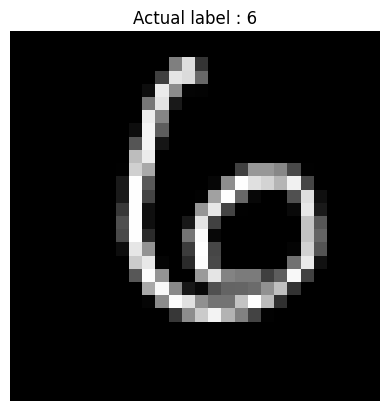

Predicted label : 6
Actual label : 6
user picked image index : 100


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


transform = transforms.ToTensor()

train_data = MNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

test_data = MNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)

train_loader = DataLoader(
    train_data,
    batch_size=64,
    shuffle=True
)

test_loader = DataLoader(
    test_data,
    batch_size=64,
    shuffle=False
)

class DigitModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.net = nn.Sequential(
            nn.Linear(28*28 , 128),
            nn.ReLU(),

            nn.Linear(128 , 64),
            nn.ReLU(),

            nn.Linear(64,10)
        )

    def forward(self, x):
        return self.net(x)
    
model = DigitModel().to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 10  # fix typo

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for images , labels in train_loader:
        images = images.view(images.size(0),-1).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")  # indented inside loop

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images , labels in test_loader:
        images = images.view(images.size(0),-1).to(device)
        labels = labels.to(device)

        outputs = model(images)
        predictions = outputs.argmax(dim=1)
        correct +=(predictions==labels).sum().item()
        total += labels.size(0)


accuracy = 100* correct/total
print(f"Total accuracy : {accuracy:.2f}%")  # print, not predictions

torch.save(model.state_dict(),"mnist_model.pth")
print("model saved as mnist_model.pth")

index = 100
image , true_label = test_data[index]  # [] not ()

plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Actual label : {true_label}")
plt.axis("off")
plt.show()

image_flat = image.view(1,-1).to(device)

with torch.no_grad():
    output = model(image_flat)
    predicted_label = output.argmax(dim=1).item()  # .item()

print(f"Predicted label : {predicted_label}")
print(f"Actual label : {true_label}")
print(f"user picked image index : {index}")